In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/process_logs.csv")
df.head()

,timestamp,pid,name,status,username,exe,label,reason
0,2025-01-01 00:00:27,76308,chrome.exe,running,user33,C:\Program Files\firefox.exe,benign,Normal application usage
1,2025-01-01 00:01:22,45036,excel.exe,running,user18,C:\Program Files\explorer.exe,benign,Normal application usage
2,2025-01-01 00:01:24,82247,notepad.exe,running,user22,C:\Program Files\teams.exe,benign,Normal application usage
3,2025-01-01 00:01:58,40407,excel.exe,running,user22,C:\Program Files\teams.exe,benign,Normal application usage
4,2025-01-01 00:02:04,20848,teams.exe,running,user42,C:\Program Files\notepad.exe,benign,Normal application usage


In [4]:
df['label'] = df.apply(lambda row: 'benign' if row['label'] == 'benign' else row['reason'], axis=1)

In [5]:
df.tail(50)

,timestamp,pid,name,status,username,exe,label,reason
99950,2025-01-30 23:35:21,46825,winword.exe,running,user24,C:\Program Files\notepad.exe,benign,Normal application usage
99951,2025-01-30 23:35:44,51013,winword.exe,running,user17,C:\Program Files\explorer.exe,benign,Normal application usage
99952,2025-01-30 23:35:52,91002,chrome.exe,running,user19,C:\Program Files\chrome.exe,benign,Normal application usage
99953,2025-01-30 23:36:01,16647,excel.exe,running,user18,C:\Program Files\winword.exe,benign,Normal application usage
99954,2025-01-30 23:36:04,13323,chrome.exe,running,user46,C:\Program Files\teams.exe,benign,Normal application usage
99955,2025-01-30 23:36:08,42650,chrome.exe,running,user21,C:\Program Files\firefox.exe,benign,Normal application usage
99956,2025-01-30 23:36:08,99764,winword.exe,running,user35,C:\Program Files\excel.exe,benign,Normal application usage
99957,2025-01-30 23:36:46,29977,notepad.exe,running,user16,C:\Program Files\teams.exe,benign,Normal application usage
99958,2025-01-30 23:37:04,13411,keylogger.exe,running,attacker2,C:\Users\attacker\AppData\ransomware.exe,Ransomware detected,Ransomware detected
99959,2025-01-30 23:37:09,33650,excel.exe,running,user49,C:\Program Files\chrome.exe,benign,Normal application usage


In [6]:
X = df.iloc[:, :-2]

Y = df["label"]

In [7]:
import pandas as pd

# Convert timestamp column to datetime format
X['timestamp'] = pd.to_datetime(X['timestamp'])

# Extract meaningful time-based features
X['hour'] = X['timestamp'].dt.hour  # Hour of the day (0-23)
X['minute'] = X['timestamp'].dt.minute  # Minute of the hour (0-59)
X['second'] = X['timestamp'].dt.second  # Second of the minute (0-59)


# Drop the original timestamp column (since it’s now numeric)
X = X.drop(columns=['timestamp'])


In [8]:
X

,pid,name,status,username,exe,hour,minute,second
0,76308,chrome.exe,running,user33,C:\Program Files\firefox.exe,0,0,27
1,45036,excel.exe,running,user18,C:\Program Files\explorer.exe,0,1,22
2,82247,notepad.exe,running,user22,C:\Program Files\teams.exe,0,1,24
3,40407,excel.exe,running,user22,C:\Program Files\teams.exe,0,1,58
4,20848,teams.exe,running,user42,C:\Program Files\notepad.exe,0,2,4
...,...,...,...,...,...,...,...,...
99995,32551,mimikatz.exe,running,attacker1,C:\Users\attacker\AppData\mimikatz.exe,23,55,52
99996,89468,notepad.exe,running,user10,C:\Program Files\firefox.exe,23,55,58
99997,2319,explorer.exe,running,user4,C:\Program Files\chrome.exe,23,56,7
99998,24381,winword.exe,running,user34,C:\Program Files\explorer.exe,23,57,27


In [10]:

from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns
encoder = LabelEncoder()
for col in ['pid', 'name', 'status' ,'username' ,'exe' ]:  
    X[col] = encoder.fit_transform(X[col])




In [9]:
X

,pid,name,status,username,exe,hour,minute,second
0,76308,chrome.exe,running,user33,C:\Program Files\firefox.exe,0,0,27
1,45036,excel.exe,running,user18,C:\Program Files\explorer.exe,0,1,22
2,82247,notepad.exe,running,user22,C:\Program Files\teams.exe,0,1,24
3,40407,excel.exe,running,user22,C:\Program Files\teams.exe,0,1,58
4,20848,teams.exe,running,user42,C:\Program Files\notepad.exe,0,2,4
...,...,...,...,...,...,...,...,...
99995,32551,mimikatz.exe,running,attacker1,C:\Users\attacker\AppData\mimikatz.exe,23,55,52
99996,89468,notepad.exe,running,user10,C:\Program Files\firefox.exe,23,55,58
99997,2319,explorer.exe,running,user4,C:\Program Files\chrome.exe,23,56,7
99998,24381,winword.exe,running,user34,C:\Program Files\explorer.exe,23,57,27


In [11]:
encoder_Y = LabelEncoder()
Y = encoder_Y.fit_transform(Y)

In [12]:
Y

array([11, 11, 11, ..., 11, 11, 11])

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)  # Normalize all numerical features




In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X,Y , random_state=104,test_size=0.25, shuffle=True)

In [15]:
import numpy as np

seq_length = 10  # Define the sequence length
feature_dim = X_train.shape[1]  # Number of features

# Reshape data for LSTM using a sliding window approach
X_train_reshaped = np.array([X_train[i: i + seq_length] for i in range(len(X_train) - seq_length)])

# Adjust labels accordingly
y_train_reshaped = np.array(y_train[seq_length:])

# Check shape
print("X_train shape:", X_train_reshaped.shape)  # Expected: (samples, seq_length, feature_dim)
print("y_train shape:", y_train_reshaped.shape)


X_train shape: (74990, 10, 8)
y_train shape: (74990,)


In [16]:
df["label"].nunique()
X.shape

(100000, 8)

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(seq_length, feature_dim)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(13, activation='softmax')  # Use 'sigmoid' for binary classification
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
from tensorflow.keras.utils import to_categorical

# Convert integer labels to categorical (one-hot)
y_train_reshaped = to_categorical(y_train_reshaped, num_classes=13)


In [19]:
print("X_train shape:", X_train_reshaped.shape)  # Expected: (num_samples, seq_length, feature_dim)
print("y_train shape:", y_train_reshaped.shape)  # Expected: (num_samples, num_classes)


X_train shape: (74990, 10, 8)
y_train shape: (74990, 13)


In [30]:
history = model.fit(X_train_reshaped, y_train_reshaped, epochs=50, batch_size=32)


Epoch 1/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 45s 17ms/step - accuracy: 0.8391 - loss: 0.8745
Epoch 2/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.8507 - loss: 0.7812
Epoch 3/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.8508 - loss: 0.7798
Epoch 4/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.8495 - loss: 0.7850
Epoch 5/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - accuracy: 0.8473 - loss: 0.7930
Epoch 6/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.8509 - loss: 0.7777
Epoch 7/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - accuracy: 0.8514 - loss: 0.7743
Epoch 8/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.8503 - loss: 0.7777
Epoch 9/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.8506 - loss: 0.7753
Epoch 10/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - accuracy: 0.8508 - loss: 0.7730
Epoch 11/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - accuracy: 0.8485 - loss: 0.7791
Epoch 12

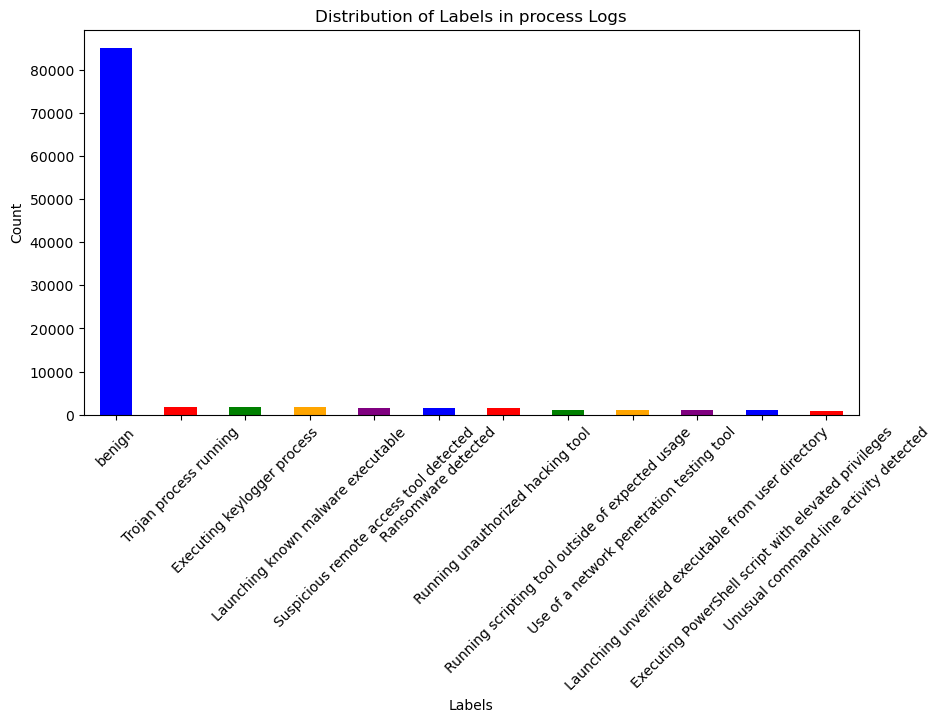

In [31]:
import matplotlib.pyplot as plt

# Count occurrences of each label
label_counts = df['label'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 5))
label_counts.plot(kind='bar', color=['blue', 'red', 'green', 'orange', 'purple'])
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution of Labels in process Logs")
plt.xticks(rotation=45)
plt.show()


In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Define RNN Model
model_rnn = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(seq_length, feature_dim)),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(13, activation='softmax')  # Adjust for the number of classes
])

model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_rnn.summary())

# Reshape X_test for RNN Evaluation
X_test_reshaped = np.array([X_test[i: i + seq_length] for i in range(len(X_test) - seq_length)])
y_test_reshaped = np.array(y_test[seq_length:])

# One-hot encode y_test_reshaped to match the model's expected output
y_test_reshaped = to_categorical(y_test_reshaped, num_classes=13)

# Train the RNN model
history_rnn = model_rnn.fit(X_train_reshaped, y_train_reshaped, epochs=50, batch_size=32)

# Evaluate the RNN model
loss, accuracy = model_rnn.evaluate(X_test_reshaped, y_test_reshaped, batch_size=32)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 10, 128)        │        17,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 13)             │           429 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,397 (126.55 KB)

 Trainable params: 32,397 (126.55 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.8295 - loss: 0.8760
Epoch 2/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8510 - loss: 0.7831
Epoch 3/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8511 - loss: 0.7799
Epoch 4/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8504 - loss: 0.7846
Epoch 5/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8496 - loss: 0.7927
Epoch 6/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8516 - loss: 0.7802
Epoch 7/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8484 - loss: 0.7915
Epoch 8/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8506 - loss: 0.7821
Epoch 9/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8518 - loss: 0.7766
Epoch 10/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8481 - loss: 0.7909
Epoch 11/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8507 - loss: 0.7795
Epoch 12/50
23